In [2]:
!pip install pandas

Libraries

In [3]:
import requests
from bs4 import BeautifulSoup as bs 
from  datasist.structdata import detect_outliers
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

URL

In [4]:
url="https://books.toscrape.com/catalogue/page-1.html"

Send request to the website to scrap

In [5]:
response=requests.get(url)
response=response.content
response

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

HTML Parsing

In [6]:
soup=bs(response,'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

Getting wanted items

In [28]:
ol= soup.find('ol')
articles= ol.find_all('article',class_="product_pod")
articles

[<article class="product_pod">
 <div class="image_container">
 <a href="frankenstein_20/index.html"><img alt="Frankenstein" class="thumbnail" src="../media/cache/00/25/0025515e987a1ebd648773f9ac70bfe6.jpg"/></a>
 </div>
 <p class="star-rating Two">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="frankenstein_20/index.html" title="Frankenstein">Frankenstein</a></h3>
 <div class="product_price">
 <p class="price_color">£38.00</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="forever-rockers-the-rocker-12_19/index.html"><img alt="Forever Rockers (The Rocker #12)" class="thumbnail" src="../media/cache/7f/b0/7fb03a053c270

Scraping items in all web pages

In [29]:
book=[]
for i in range(1,51):
    url=f"https://books.toscrape.com/catalogue/page-{i}.html"
    response=requests.get(url)
    response=response.content
    soup=bs(response,'html.parser')
    ol= soup.find('ol')
    articles= ol.find_all('article',class_="product_pod")
   

    for article in articles:
      image=article.find('img')
      title=image.attrs['alt']
      star= article.find('p')
      star=star['class']
      price=article.find('p', class_='price_color').text
      price=float(price[1:])
      book.append([title,price,star])

Storing items in csv file

In [30]:
df=pd.DataFrame(book,columns=['Title','Price','Star Rating'])

In [31]:
df.to_csv('books.csv')

Read dataset from the scv file

In [32]:
df=pd.read_csv("books.csv")
df

,Unnamed: 0,Title,Price,Star Rating
0,0,A Light in the Attic,51.77,"['star-rating', 'Three']"
1,1,Tipping the Velvet,53.74,"['star-rating', 'One']"
2,2,Soumission,50.10,"['star-rating', 'One']"
3,3,Sharp Objects,47.82,"['star-rating', 'Four']"
4,4,Sapiens: A Brief History of Humankind,54.23,"['star-rating', 'Five']"
...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,"['star-rating', 'One']"
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,"['star-rating', 'Four']"
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,"['star-rating', 'Five']"
998,998,1st to Die (Women's Murder Club #1),53.98,"['star-rating', 'One']"


Rename the first column

In [33]:
df = df.rename(columns={'Unnamed: 0': 'id'})

In [34]:
df

,id,Title,Price,Star Rating
0,0,A Light in the Attic,51.77,"['star-rating', 'Three']"
1,1,Tipping the Velvet,53.74,"['star-rating', 'One']"
2,2,Soumission,50.10,"['star-rating', 'One']"
3,3,Sharp Objects,47.82,"['star-rating', 'Four']"
4,4,Sapiens: A Brief History of Humankind,54.23,"['star-rating', 'Five']"
...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,"['star-rating', 'One']"
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,"['star-rating', 'Four']"
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,"['star-rating', 'Five']"
998,998,1st to Die (Women's Murder Club #1),53.98,"['star-rating', 'One']"


Checking if columns data types are right

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Price        1000 non-null   float64
 3   Star Rating  1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


Changing star rating from string to int values

In [36]:
for index, row in df.iterrows():
    if row['Star Rating'] == "['star-rating', 'Zero']":
        df.at[index, 'Star Rating'] = 0
    elif row['Star Rating'] == "['star-rating', 'One']":
        df.at[index, 'Star Rating'] = 1
    elif row['Star Rating'] == "['star-rating', 'Two']":
        df.at[index, 'Star Rating'] = 2
    elif row['Star Rating'] == "['star-rating', 'Three']":
        df.at[index, 'Star Rating'] = 3
    elif row['Star Rating'] == "['star-rating', 'Four']":
        df.at[index, 'Star Rating'] = 4
    elif row['Star Rating'] == "['star-rating', 'Five']":
        df.at[index, 'Star Rating'] = 5
    
df['Star Rating'] = df['Star Rating'].astype(int)

In [37]:
df

,id,Title,Price,Star Rating
0,0,A Light in the Attic,51.77,3
1,1,Tipping the Velvet,53.74,1
2,2,Soumission,50.10,1
3,3,Sharp Objects,47.82,4
4,4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,998,1st to Die (Women's Murder Club #1),53.98,1


checking null values

In [38]:
df.isnull().sum()

id             0
Title          0
Price          0
Star Rating    0
dtype: int64

Checking dooublecates

In [39]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, Title, Price, Star Rating]
Index: []


5 number summery

In [40]:
df.describe()

,id,Price,Star Rating
count,1000.000000,1000.00000,1000.000000
mean,499.500000,35.07035,2.923000
std,288.819436,14.44669,1.434967
min,0.000000,10.00000,1.000000
25%,249.750000,22.10750,2.000000
50%,499.500000,35.98000,3.000000
75%,749.250000,47.45750,4.000000
max,999.000000,59.99000,5.000000


In [41]:
df.describe().round()

,id,Price,Star Rating
count,1000.0,1000.0,1000.0
mean,500.0,35.0,3.0
std,289.0,14.0,1.0
min,0.0,10.0,1.0
25%,250.0,22.0,2.0
50%,500.0,36.0,3.0
75%,749.0,47.0,4.0
max,999.0,60.0,5.0


Box plotes 

<Axes: xlabel='Price'>

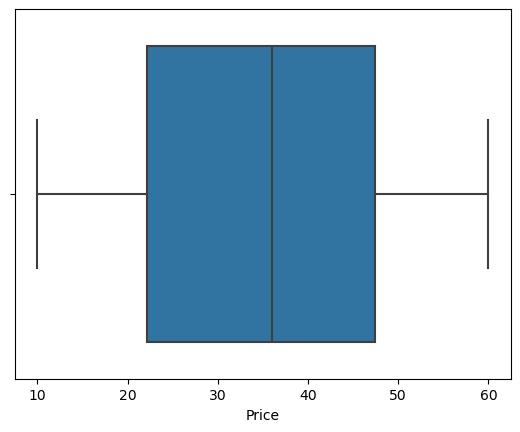

In [42]:
sns.boxplot(x='Price',data=df)

<Axes: xlabel='Star Rating'>

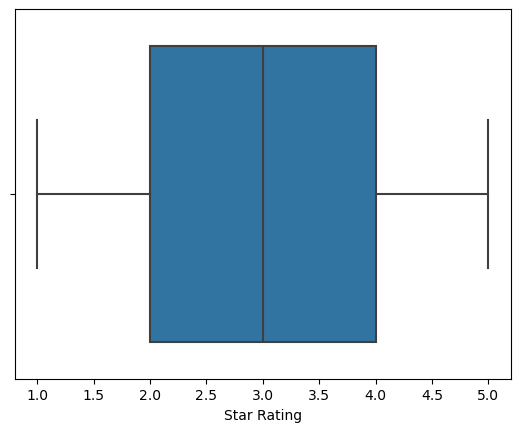

In [43]:
sns.boxplot(x='Star Rating',data=df)

Checking outlaiers

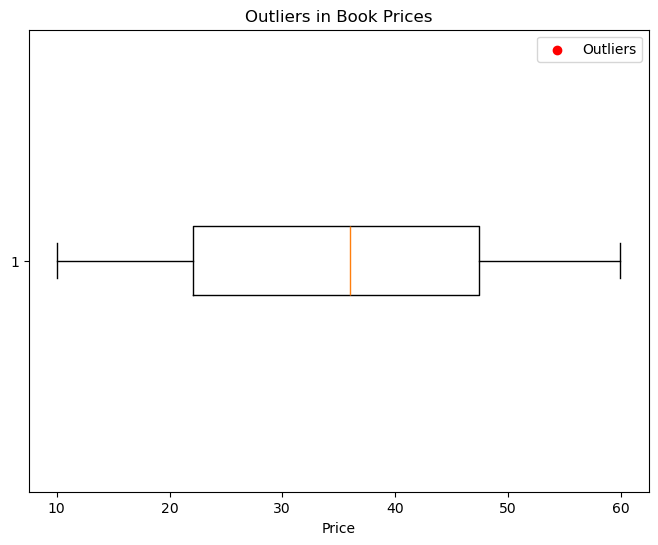

In [44]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Visualize outliers with a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False)
plt.scatter(outliers['Price'], [1] * len(outliers), color='red', label='Outliers')
plt.xlabel('Price')
plt.title('Outliers in Book Prices')
plt.legend()
plt.show()

*Questions:

1.what is the most common words in book names?

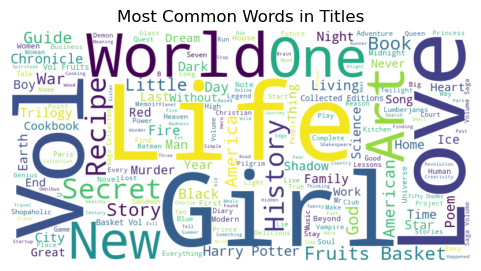

In [46]:
all_words = ' '.join(df['Title'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()

2.What is the highest rated book?

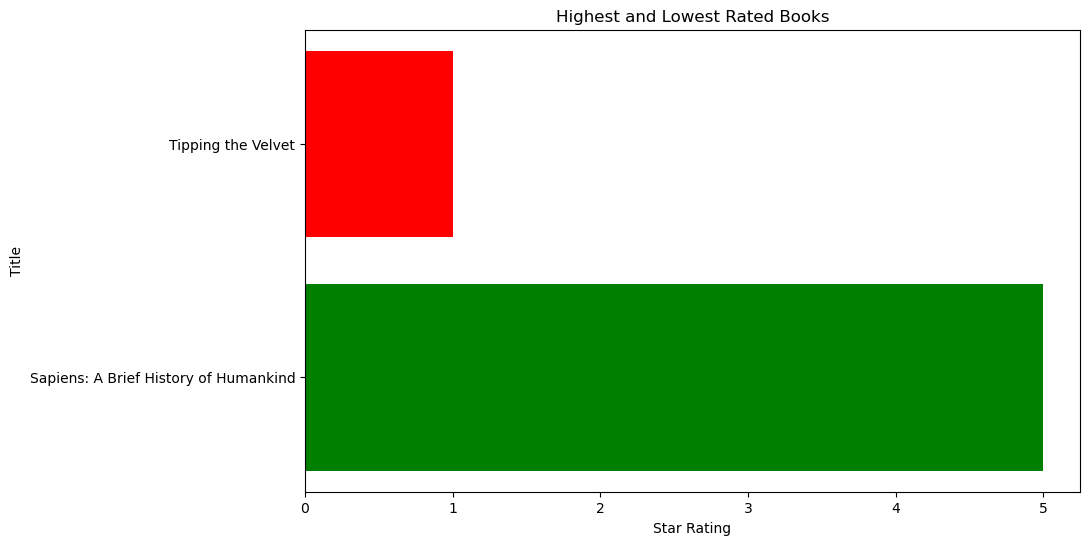

In [47]:
# Find the highest rated book
highest_rated_book = df.loc[df['Star Rating'].idxmax()]

# Find the lowest rated book
lowest_rated_book = df.loc[df['Star Rating'].idxmin()]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh([highest_rated_book['Title'], lowest_rated_book['Title']],
         [highest_rated_book['Star Rating'], lowest_rated_book['Star Rating']],
         color=['green', 'red'])
plt.xlabel('Star Rating')
plt.ylabel('Title')
plt.title('Highest and Lowest Rated Books')
plt.show()

3.what is the most common prefered price range for readers based on star rating?

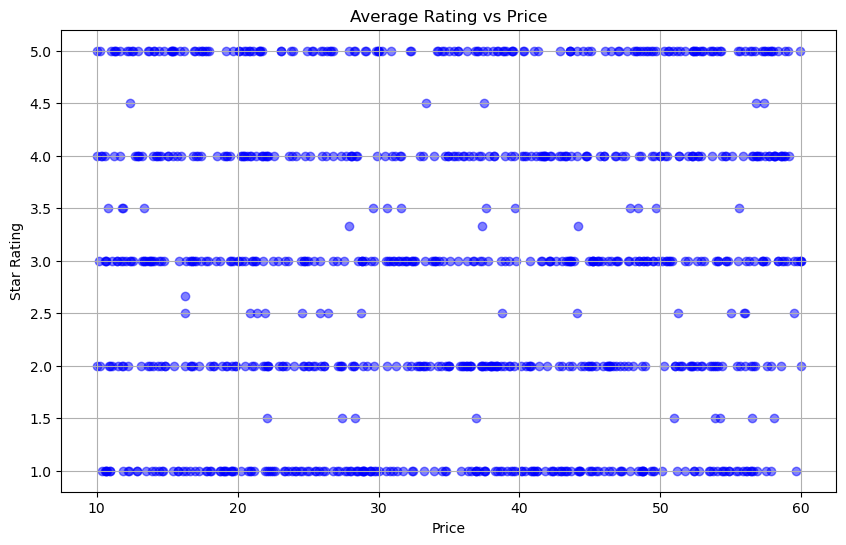

In [49]:
# Group the books by price and calculate the average rating for each price group
average_rating_by_price = df.groupby('Price')['Star Rating'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_rating_by_price.index, average_rating_by_price.values, color='blue', alpha=0.5)
plt.title('Average Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Star Rating')
plt.grid(True)
plt.show()

4.what is books number in each category?

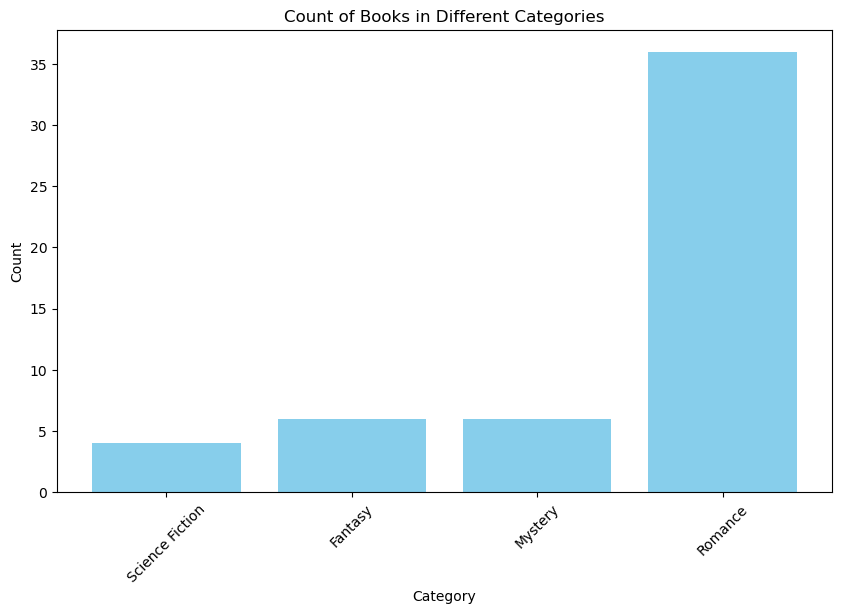

In [50]:
# Define categories and their corresponding keywords
categories_keywords = {
    'Science Fiction': ['science fiction', 'sci-fi', 'space', 'futuristic'],
    'Fantasy': ['fantasy', 'magic', 'mythical'],
    'Mystery': ['mystery', 'detective', 'crime'],
    'Romance': ['romance', 'love', 'relationship'],
    # Add more categories and their keywords as needed
}

# Count the number of books in each category based on title keywords
category_counts = {}
for category, keywords in categories_keywords.items():
    category_count = df[df['Title'].str.contains('|'.join(keywords), case=False, na=False)].shape[0]
    category_counts[category] = category_count

# Create a DataFrame to hold the counts
category_counts_df = pd.DataFrame({'Category': list(category_counts.keys()),
                                   'Count': list(category_counts.values())})

# Visualize the count of books in all categories
plt.figure(figsize=(10, 6))
plt.bar(category_counts_df['Category'], category_counts_df['Count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Books in Different Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


5.what is the number of category like (science fiction) books compared with other categories books?

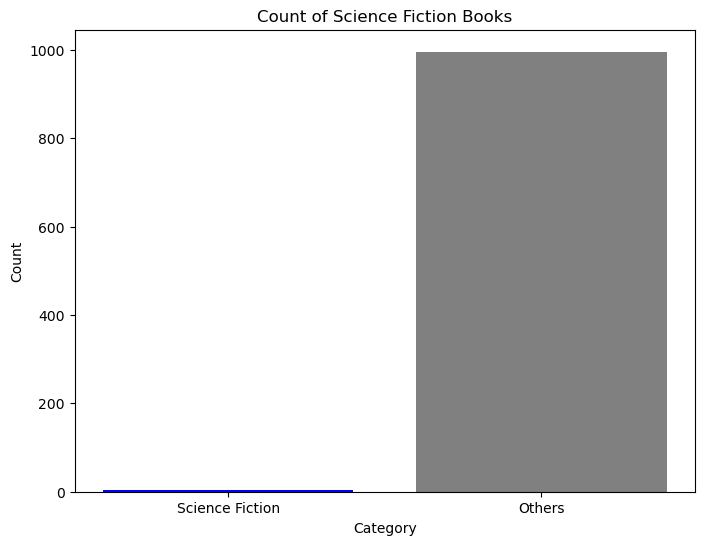

In [52]:
# Define keywords related to science fiction
sci_fi_keywords = ['science fiction', 'sci-fi', 'space', 'futuristic']

# Count the number of books classified as science fiction based on title
sci_fi_count = df[df['Title'].str.contains('|'.join(sci_fi_keywords), case=False, na=False)].shape[0]

# Create a DataFrame to hold the counts
sci_fi_counts_df = pd.DataFrame({'Category': ['Science Fiction', 'Others'],
                                 'Count': [sci_fi_count, len(df) - sci_fi_count]})

# Visualize the count of science fiction books
plt.figure(figsize=(8, 6))
plt.bar(sci_fi_counts_df['Category'], sci_fi_counts_df['Count'], color=['blue', 'gray'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Science Fiction Books')
plt.show()


6.what is the most ten expensive and cheapest books? 

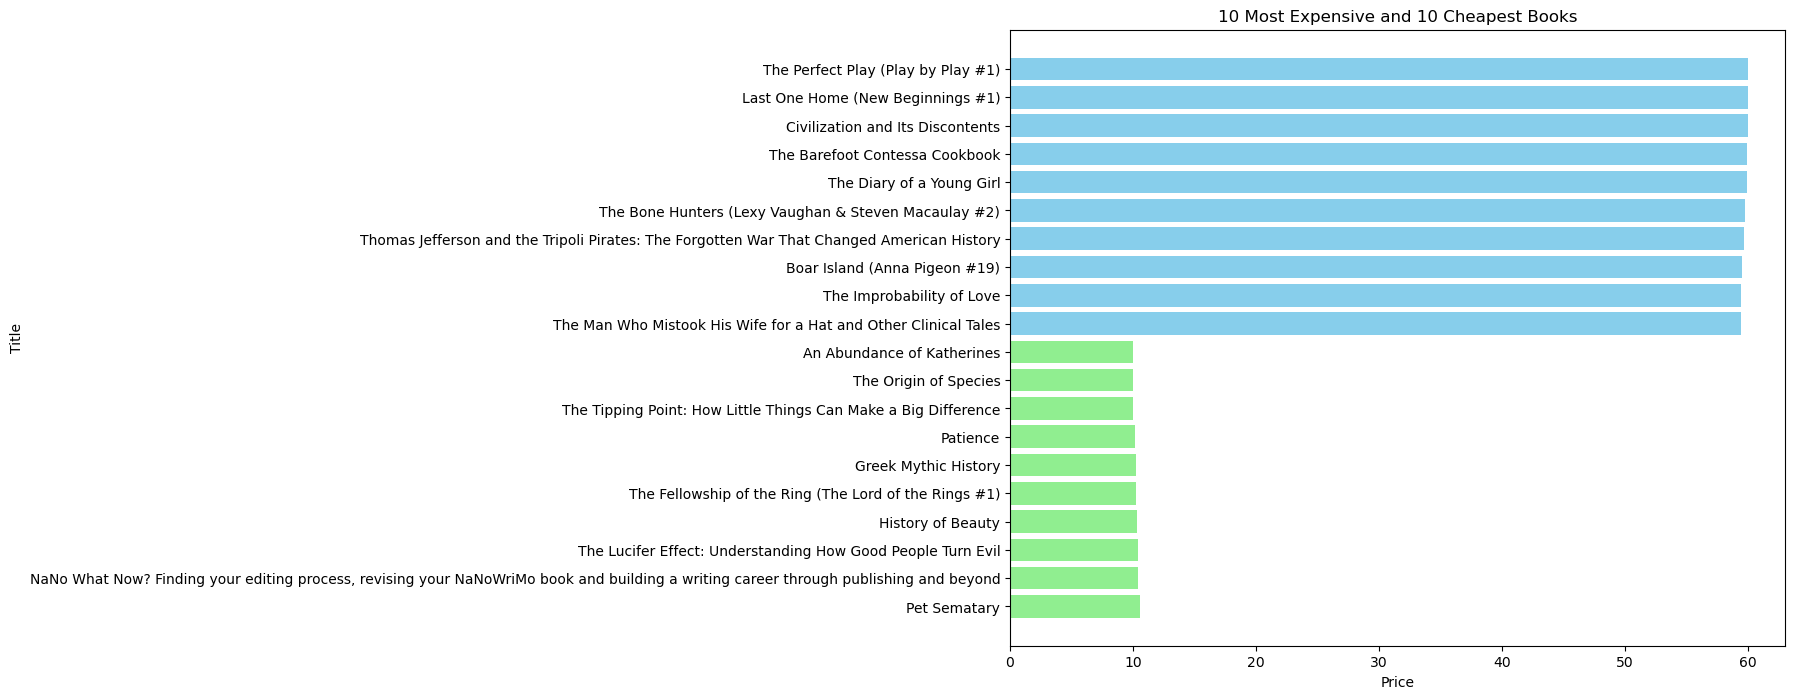

In [53]:
# Find the 10 most expensive and 10 cheapest books
most_expensive_books = df.nlargest(10, 'Price')
cheapest_books = df.nsmallest(10, 'Price')

# Combine the two sets of books
combined_books = pd.concat([most_expensive_books, cheapest_books])

# Visualize the 10 most expensive and 10 cheapest books
plt.figure(figsize=(10, 8))
plt.barh(combined_books['Title'], combined_books['Price'], color=['skyblue'] * 10 + ['lightgreen'] * 10)
plt.xlabel('Price')
plt.ylabel('Title')
plt.title('10 Most Expensive and 10 Cheapest Books')
plt.gca().invert_yaxis()  # Invert y-axis to display the most expensive book on top
plt.show()
